In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import io
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import  files
from google.colab import drive
uploaded=files.upload()

In [ ]:
data = pd.read_csv('data_hep.csv')
datadf = data.rename(columns={'type': 'event_type'})
print(datadf.shape)
datadf.loc[datadf['event_type'] == 5]

In [ ]:
# this code gives the best dimensionality to perform LDA and to reduce the features in dataset to give the best accuracy between test and predict data using random forest classifier
data = pd.read_csv('data_hep.csv')
datadf = data.rename(columns={'type': 'event_type'})
datadf = datadf.iloc[:, 1:]

event_types = {
    "e+ e- -> Upsilon(4S) -> B+ B-": 0,
    "e+ e- -> Upsilon(4S) -> B0 B0-bar": 1,
    "e+ e- -> c c-bar": 2,
    "e+ e- -> u u-bar": 3,
    "e+ e- -> d d-bar": 4,
    "e+ e- -> s s-bar": 5
}
n_components_range = range(1, min(len(data.columns), len(event_types) - 1))

best_accuracy = 0
best_n_components = 0

# Iterate through each n_components value
for n_components in n_components_range:
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    # Fit and transform the features in the dataframe to perform LDA
    X_lda = lda.fit_transform(datadf.drop('event_type', axis=1), datadf['event_type'])
    accuracies = []
     # Iterate through each event type in the event_types list
    for event_type, label in event_types.items():
        # Prepare the dataset for this specific event type using LDA-transformed features
        X = X_lda
        y = (datadf['event_type'] == label).astype(int)  # Binary label for this event type for 1 if label equal to event and 0 for not equal
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Create and train a classification model
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)
        # Make predictions on the test set
        y_pred = clf.predict(X_test)
        # Evaluate the model for this event type by calculating accuracy of test and predict data
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    # Calculate the average accuracy across all event types for this n_components
    average_accuracy = np.mean(accuracies)
    # Check if this is the best n_components so far
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_n_components = n_components
print(f"Best accuracy: {best_accuracy}")
print(f"Best n_components: {best_n_components}")

Best accuracy: 0.9069890950290328
Best n_components: 4


In [ ]:
# this code gives the contribution of each feature in making the 4 LDA components
data = pd.read_csv('data_hep.csv')
datadf = data.rename(columns={'type': 'event_type'})
datadf = datadf.iloc[:, 1:]
lda = LinearDiscriminantAnalysis(n_components=4)

# Fit and transform the features in the dataframe to perform LDA
lda.fit(datadf.drop('event_type', axis=1), datadf['event_type'])

# Access the coefficients of contribution for each feature in all LDA components
feature_contributions = lda.scalings_

# Create an empty DataFrame to store the contributions
df = pd.DataFrame(columns=['Feature'] + [f'LDA Component {i + 1}' for i in range(feature_contributions.shape[1])])

# Populate the DataFrame with feature contributions
for i, feature in enumerate(datadf.columns[:-1]):
    contributions = [feature] + list(feature_contributions[i])
    df.loc[i] = contributions

print(df)


FileNotFoundError: ignored

Event Type: e+ e- -> Upsilon(4S) -> B+ B- (Label 0):
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14022
           1       0.00      0.00      0.00       100

    accuracy                           0.99     14122
   macro avg       0.50      0.50      0.50     14122
weighted avg       0.99      0.99      0.99     14122

Event Type: e+ e- -> Upsilon(4S) -> B0 B0-bar (Label 1):
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7021
           1       0.93      0.97      0.95      7101

    accuracy                           0.94     14122
   macro avg       0.95      0.94      0.94     14122
weighted avg       0.95      0.94      0.94     14122

Event Type: e+ e- -> c c-bar (Label 2):
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9507
           1       0.90      0.85      0.8

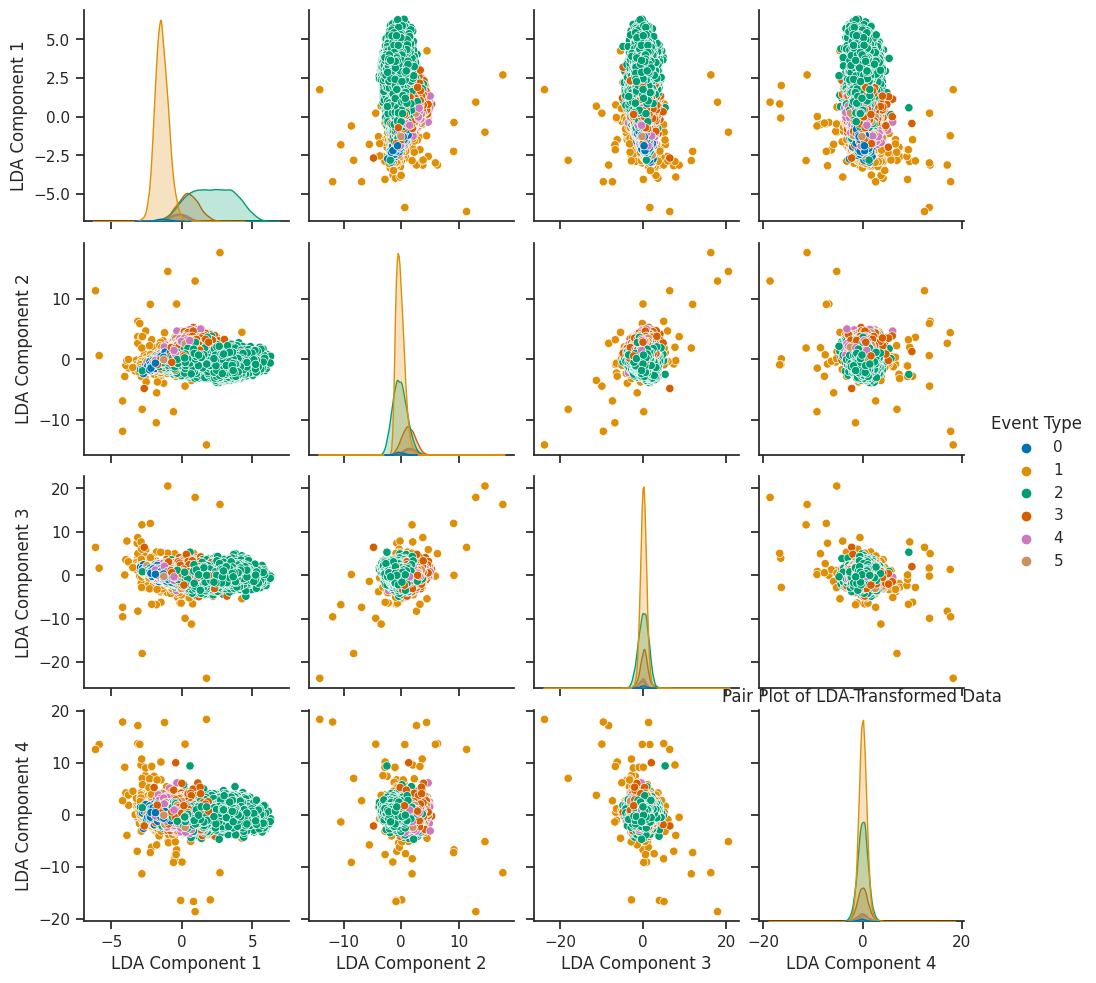

In [ ]:
# this code performs LDA and random forest classifier on the dataset and tells the accuracy of test and predict data and gives classification report for each event and also gives a pairplot for the all four LDA componenets
event_types = {
    "e+ e- -> Upsilon(4S) -> B+ B-": 0,
    "e+ e- -> Upsilon(4S) -> B0 B0-bar": 1,
    "e+ e- -> c c-bar": 2,
    "e+ e- -> u u-bar": 3,
    "e+ e- -> d d-bar": 4,
    "e+ e- -> s s-bar": 5
}
n_components = 4
lda = LinearDiscriminantAnalysis(n_components=n_components)

# Fit and transform the features in the dataframe to perform LDA
X_lda = lda.fit_transform(datadf.drop('event_type', axis=1), datadf['event_type'])

# Create a pair plot for the LDA-transformed data
lda_data = pd.DataFrame(data=X_lda, columns=[f'LDA Component {i}' for i in range(1, n_components + 1)])
lda_data['Event Type'] = datadf['event_type']
sns.pairplot(lda_data, hue='Event Type', palette='colorblind')
plt.title('Pair Plot of LDA-Transformed Data')

# Iterate through each event type
for event_type, label in event_types.items():
    # Prepare the dataset for this specific event type using LDA-transformed features
    X = X_lda
    y = (datadf['event_type'] == label).astype(int)  # Binary label for this event type
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Create and train a classification model on the LDA performed data
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model for this event type using accuaracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Event Type: {event_type} (Label {label}):")
    print(f'Accuracy: {accuracy:.2f}')
    print(report)
plt.show()


In [ ]:
# this gives the confusion matrix for the test data set indicating true positive, false positive, true negative and false negative
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[13855     3]
 [  263     1]]


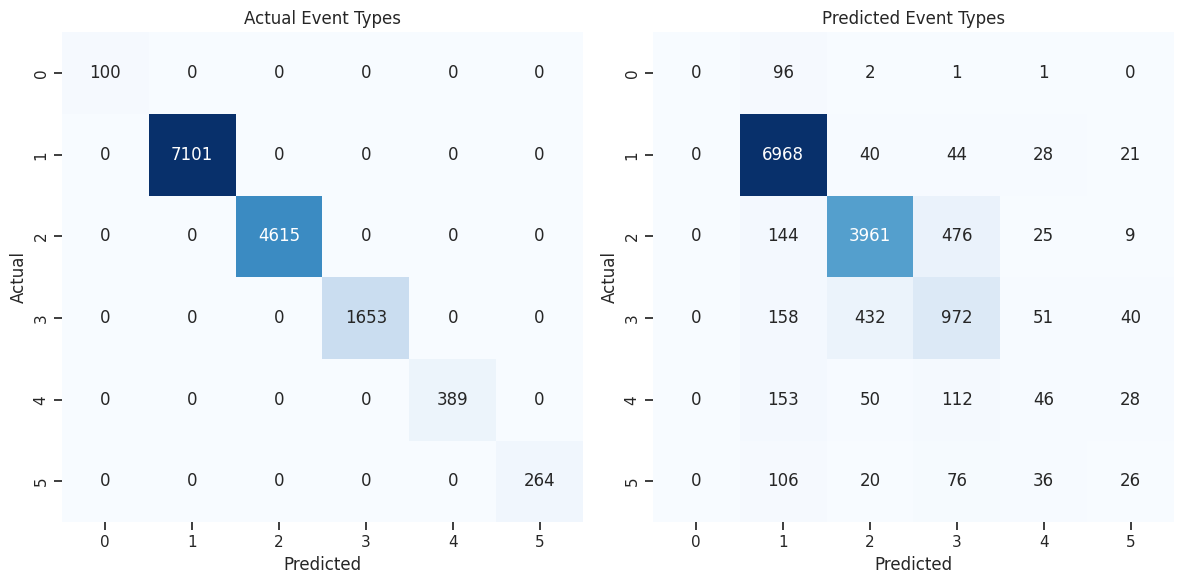

In [ ]:
# this code gives a heatmap for the predicted and the test dataset telling which and how much events are predicted accurately and which events are predicted wrongly by comparing with the true events in the heatmap parallel to it
X = datadf.drop('event_type', axis=1) # feature dataset
y = datadf['event_type'] #target dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Perform Linear Discriminant Analysis (LDA) on the training and test data with four components
lda = LinearDiscriminantAnalysis(n_components=4)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Create a Random Forest Classifier and train it on the LDA-transformed training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_lda, y_train)
# Make predictions on the LDA-transformed test data
y_pred = clf.predict(X_test_lda)

# Create a confusion matrix for the actual and predicted event types
confusion_matrix_actual = confusion_matrix(y_test, y_test)  # To get a square matrix for actual data
confusion_matrix_predicted = confusion_matrix(y_test, y_pred)

# Create a heatmap for the actual event types
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_actual, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Actual Event Types")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Create a heatmap for the predicted event types
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_predicted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Predicted Event Types")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


Everyone had equal contribution, each made different model and one which gave best results an accuracy was choosen